In [15]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

<IPython.core.display.Javascript object>


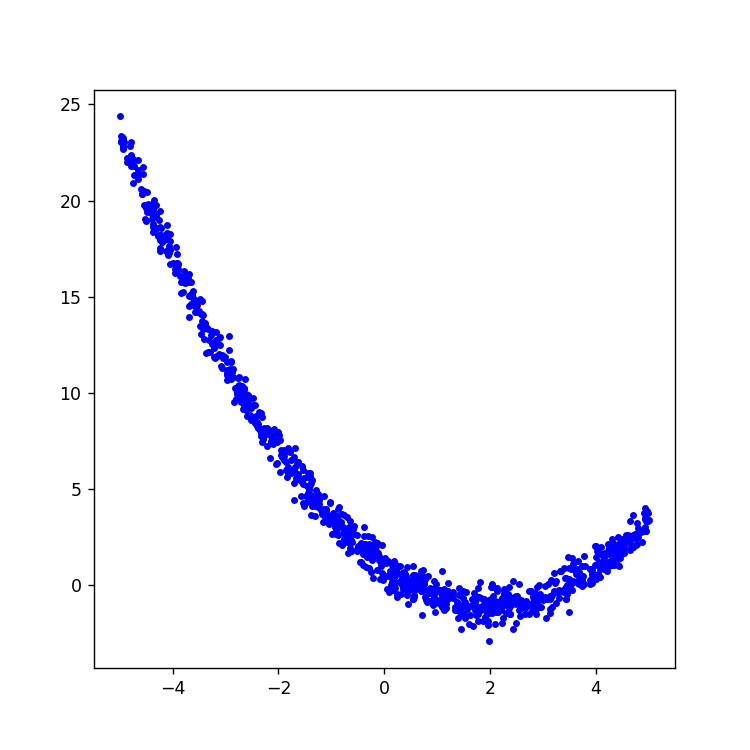

In [16]:
# Import .csv file training
df = pd.read_csv('training.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.')

In [17]:
# Descobrindo o valor de variaveis
M = int(len(x))

x0 = np.ones((M,1))
x1 = np.reshape(x,(M,1))
y = np.reshape(y,(M,1))

In [18]:
#Closed form solution

X = np.c_[x0, x1]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x0 + a_opt[1, 0]*x1
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [19]:
# Batch gradient descent solution

# Learning Rate
alpha = 0.08

# Max. number of interactions
n_iterations = M

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

#Loop batch
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))

#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    
    iteration = iteration + 1

<IPython.core.display.Javascript object>


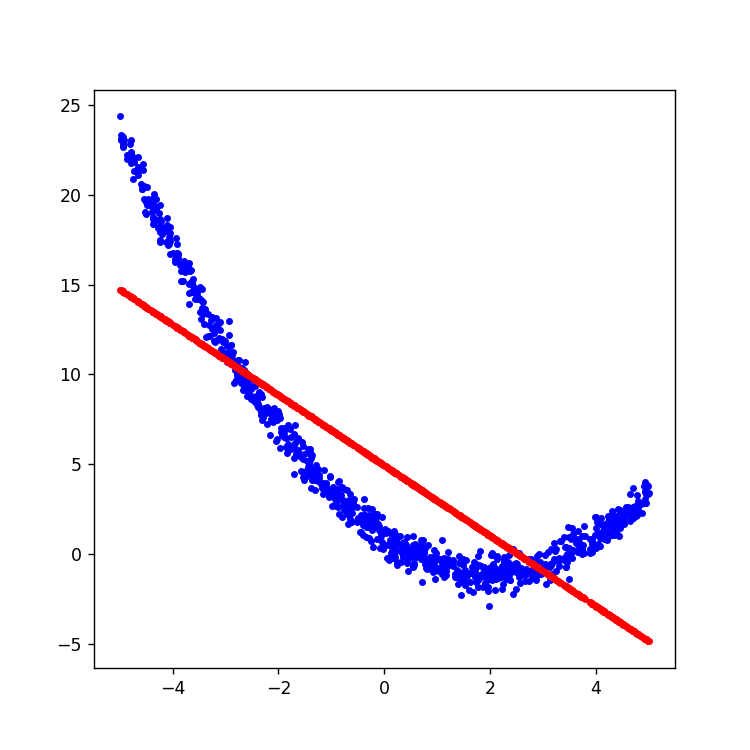

In [20]:
# PLot Graphics
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'b.')
plt.plot(x, yhat, 'r.')

<IPython.core.display.Javascript object>


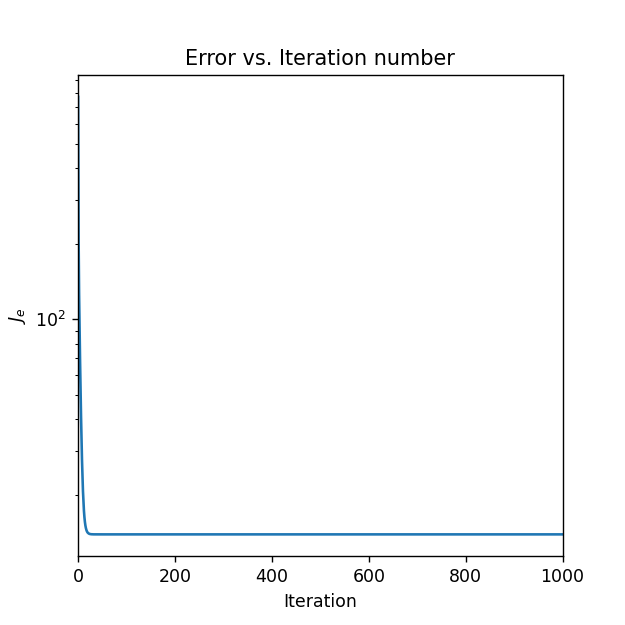

In [21]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [22]:
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_batch: ' + str(a[0, 0]))
print('a1_batch: ' + str(a[1, 0]))

a0_opt: 4.9393619680212915
a1_opt: -1.9593032431040327
a0_batch: 4.939361968021294
a1_batch: -1.9593032431040305


<IPython.core.display.Javascript object>


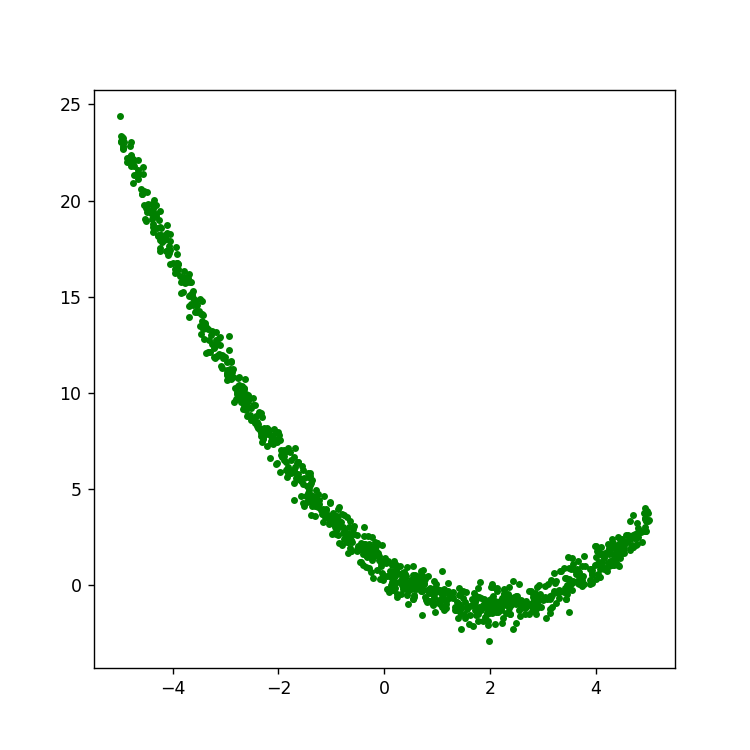

In [23]:
# Import .csv file predicting
df = pd.read_csv('predicting.csv', header=None)
xp = df[0].to_numpy()
yp = df[1].to_numpy()
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, 'g.')

In [24]:
# Reorganize data
y_predict = np.reshape(yp,(M,1))

# Error
hx = a[0, 0]*x0 + a[1, 0]*x1

J_predict1 = (1/M)*np.sum(np.power((y_predict - hx), 2) )
J_predict2 = (1/M)*np.sum(np.power((y_predict - yhat), 2) )

In [25]:
print(J_predict1)
print(J_predict2)

14.303365603491017
14.303365603491015
